In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

tips = sns.load_dataset('tips')

In [3]:

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:

tips.shape

(244, 7)

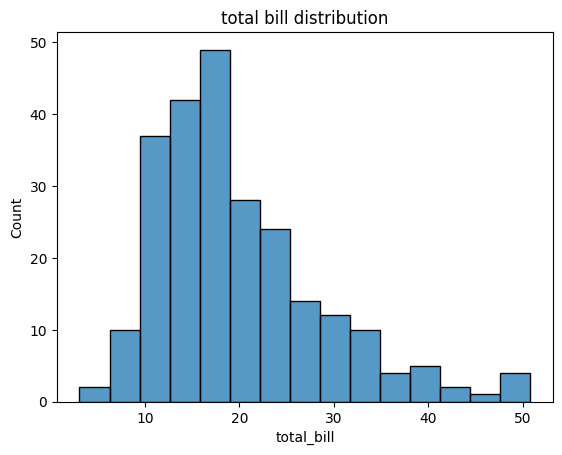

In [5]:
sns.histplot(tips['total_bill'], kde = False, bins = 15)    # no smooth curve (Kernel Density Estimation)
plt.title('total bill distribution');

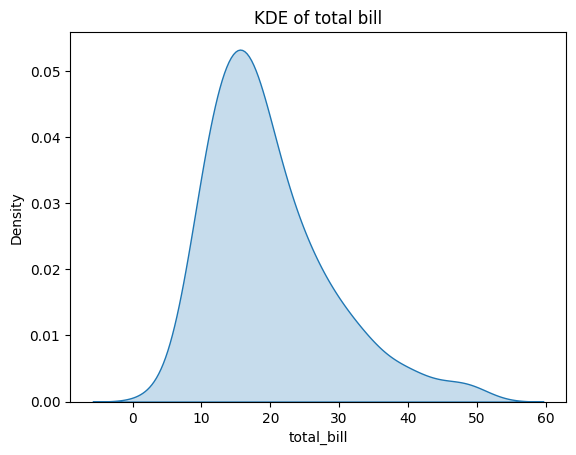

In [6]:
sns.kdeplot(tips['total_bill'], fill = True)
plt.title("KDE of total bill");

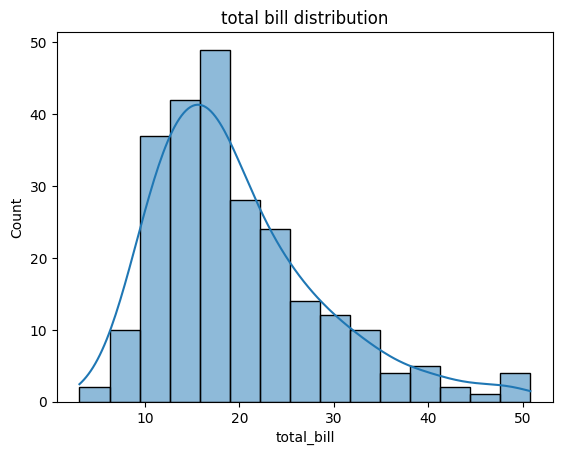

In [7]:

sns.histplot(tips['total_bill'], kde = True, bins = 15)
plt.title('total bill distribution');

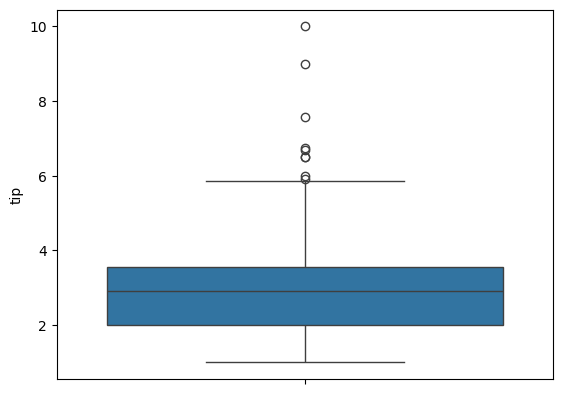

In [8]:
'''
    A box plot (or whisker plot) is a graphical representation of a dataset’s distribution. It shows:

        Minimum (lowest value, ignoring outliers)
        First quartile (Q1) -> 25th percentile
        Median (Q2) -> 50th percentile
        Third quartile (Q3) -> 75th percentile
        Maximum (highest value, ignoring outliers)
        Outliers -> points far away from most data (plotted as dots)
'''

sns.boxplot(tips['tip']);

In [9]:
# 75% of data is below this value (or 25% above).
q3 = np.percentile(tips['tip'], 75)
# 25% of data is below this value.
q1 = np.percentile(tips['tip'], 25)
q3, q1

(np.float64(3.5625), np.float64(2.0))

In [10]:
# Measures spread of the middle 50% of data.
# Helps detect outliers.

iqr = q3 - q1
iqr

np.float64(1.5625)

In [11]:
# Measures spread of the middle 50% of data.
# Helps detect outliers.

ub = q3 + iqr * 1.5     # Any value above UB is considered an outlier.
lb = q1 - 1.5 * iqr     # Any value below LB is considered an outlier.
ub, lb

(np.float64(5.90625), np.float64(-0.34375))

In [12]:
# remove the outliers
x = tips[(tips['tip'] > lb) & (tips['tip'] < ub)]

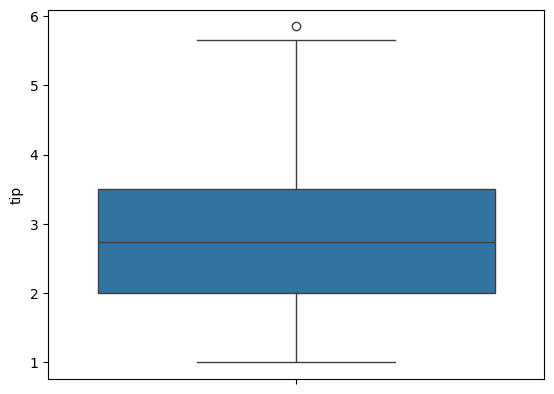

In [13]:
sns.boxplot(x['tip']);

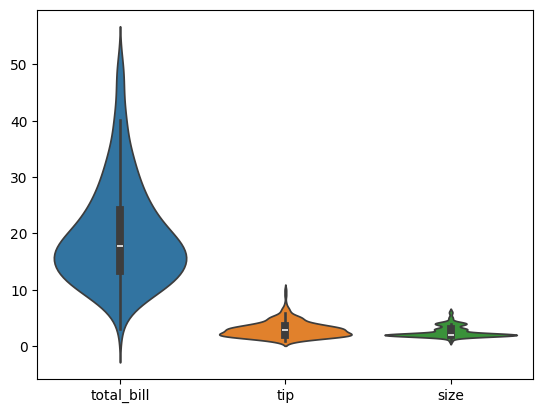

In [14]:
# violin plot -> kde + boxplot

sns.violinplot(tips);

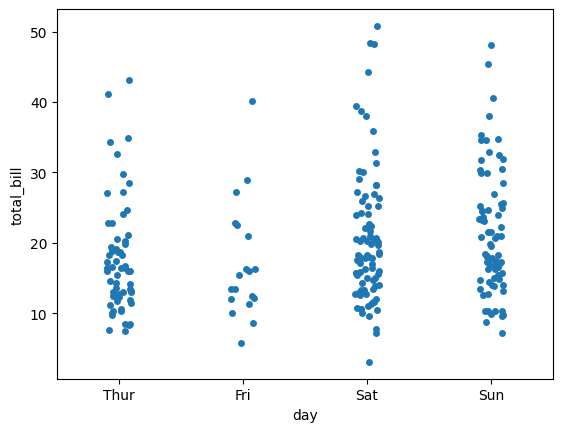

In [15]:
# stripplot -> jittered scatter plot

sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter= True);

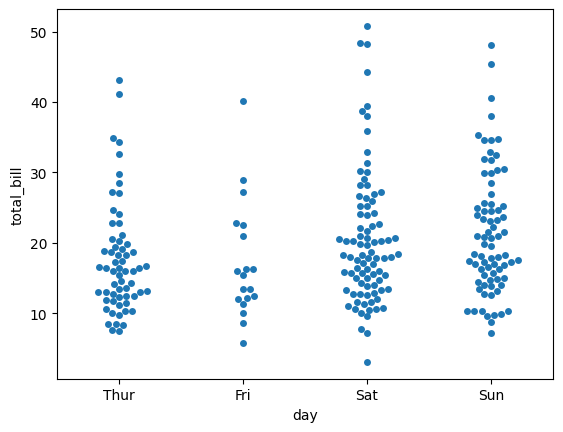

In [16]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips);

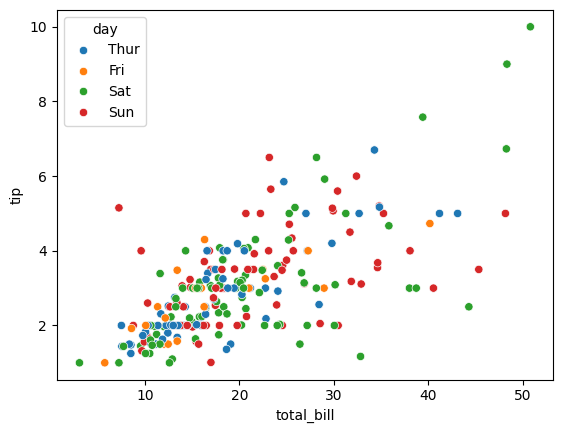

In [17]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips,
               hue = 'day');

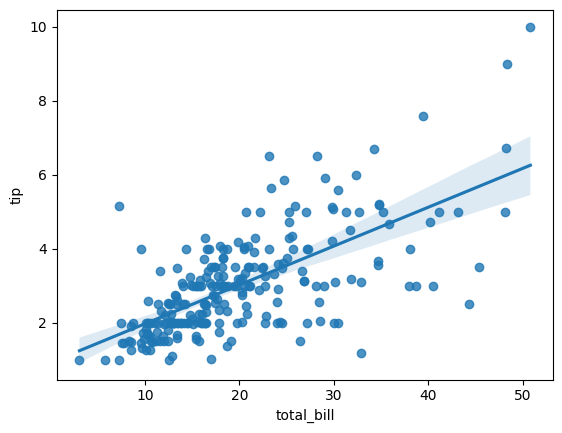

In [18]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips);

In [19]:
# heatmap

corr = tips.corr(numeric_only = True)

In [20]:

corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


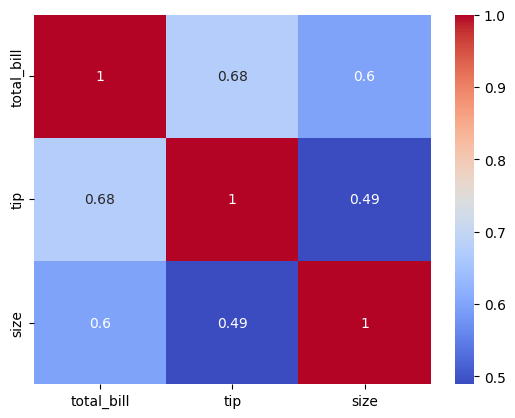

In [21]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm');

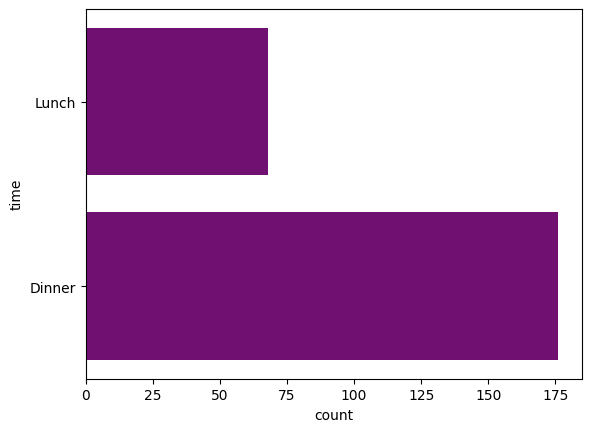

In [22]:
# countplot

sns.countplot(tips['time'], color = 'purple');

In [23]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


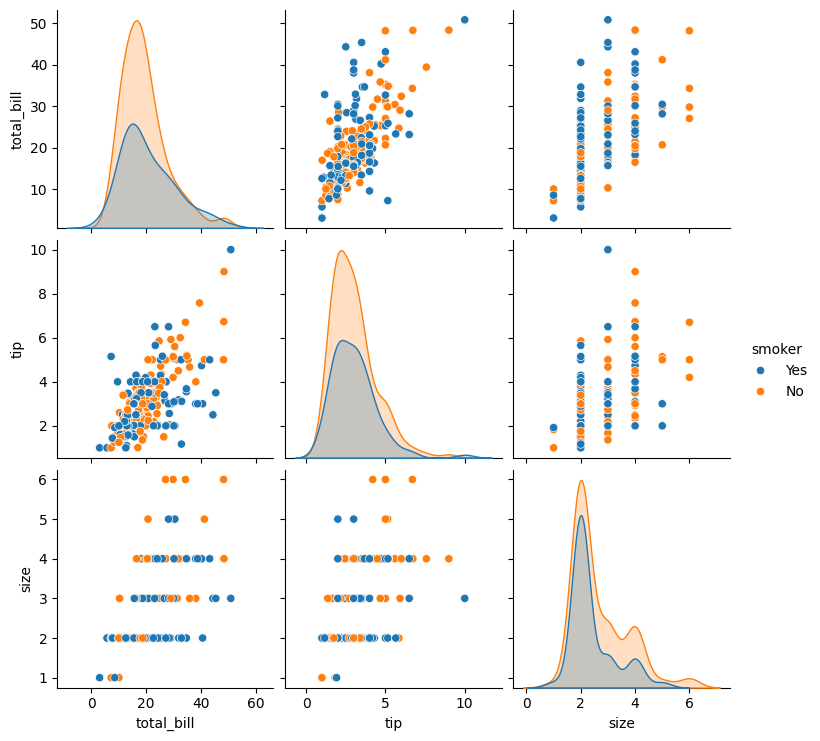

In [24]:
sns.pairplot(tips, hue = 'smoker');

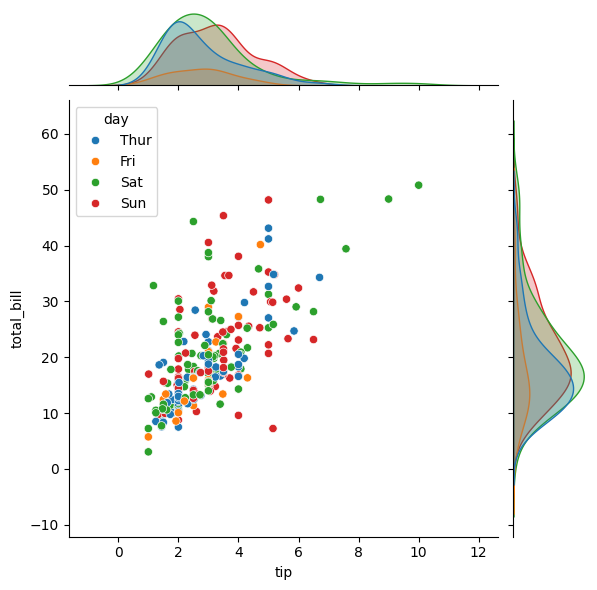

In [25]:
sns.jointplot(x = 'tip', y = 'total_bill', data = tips,
             hue = 'day');

In [26]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [27]:
sns.load_dataset('diamonds')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
